### Open Air Test Objective
The results from this test will inform propeller selection for the rest of our testing. While we expect duct aerodynamics to change relative propeller performance, this test will ensure we are capable of producing enough thrust for our application (hovering flight with a payload).

Props that produce significantly less thrust than required to lift a payload (~12 N) will be eliminated and a propeller with high power efficiency around the 12 N range will be selected, with slight preference toward high efficiency in the 8 N range (flight without payload) and high full throttle thrust.

This test will also validate full throttle performance of our new motors as their lower KV rating will result in a reduced maximum test rpm. We must ensure that they spin our propellers fast enough to produce the thrust required for flight with a payload.

### Procedure
- Initiate sweep from 0-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Open Air Test Configurations
| Propeller Type    | Propeller Diameter    | Propeller Pitch  | Propeller Tip Profile | Test Status |
|-                  |-                      |-                 |-                      |-            |
| HQ Prop 6-blade   | 5 in / 127 mm         |  4               | Unshaved              | In Progress |
| HQ Prop 3-blade   | 5 in / 127 mm         |  4               | Unshaved              | Pending     |
| Toroidal 2-blade  | 5.1 in / 129.54 mm    |  4.5             | Unshaved              | In Progress |
| White 3-blade     | 7 in / 177.8 mm       |  3.5             | Unshaved              | In Progress |
| HQ Prop 4-blade   | 6 in / 152.4 mm       |  3.8             | Unshaved              | In Progress |
| HQ Prop 6-blade   | TBD                   |  4               | Shaved                | Blocked     |

### Hypothesis
- For propellers of the same diameter, we expect configurations with higher blade count and higher pitch to produce greater thrust. We expect low pitch, low blade count propellers to produce less thrust, but have higher thrust-power efficiency. 
- As propeller diameter is increased, both thrust and thrust-power efficiency are expected to improve.

### Analysis
Average battery voltage, motor currents, and thrust will be collected for each throttle step after the transients stabilize, and a thrust vs. electrical power plot will be made to compare all props.

### Observations

For our first few full throttle tests, we noticed our thrust start to decrease as throttle went above about 75%, the root cause of this was determined to be the movable carriage hitting the end stops, which were taking up some of the load since the jig was remounted to a new base and the relative positioning of components changed since the last test.

In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)
#step_range = [10]

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [3]:
test_directory = Path("../test_data/open_air/")
data_dict = {}

In [4]:
data_dict["test_5in_6blade"] = test_run(
    filename=test_directory / "test_5in_6blade.csv", plan=plan
)
# data_dict["test_5in_4blade_blue"] = test_run(
#     filename=test_directory / "test_5in_4blade_blue.csv", plan=plan
# )
# data_dict["test_6in_4blade"] = test_run(
#     filename=test_directory / "test_6in_4blade.csv", plan=plan
# )
# data_dict["test_7in_3blade"] = test_run(
#     filename=test_directory / "test_7in_3blade.csv", plan=plan
# )
# data_dict["test_5in_toroidal"] = test_run(
#     filename=test_directory / "test_5in_toroidal.csv", plan=plan
# )
data_dict["test_5in_3blade"] = test_run(
    filename=test_directory / "test_5in_3blade.csv", plan=plan
)
data_dict["test_5in_6blade_rerun"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun.csv", plan=plan
)
data_dict["test_5in_3blade_rerun"] = test_run(
    filename=test_directory / "test_5in_3blade_rerun.csv", plan=plan
)

Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [5]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name             time_ms                                      
test_5in_6blade       0.446                0.0               0.0   
                      5.174                0.0               0.0   
                      8.154                0.0               0.0   
                      11.162               0.0               0.0   
                      14.154               0.0               0.0   
...                                        ...               ...   
test_5in_3blade_rerun 41970.159         1028.0            1028.0   
                      41973.163          971.0            1000.0   
                      41976.159          971.0             985.0   
                      41979.163          928.0             942.0   
                      41982.151          928.0             914.0   

                                 batt_voltage_V  batt_current_A  \
test_name             time_ms                                     
test_5in_6blade       0.446           18.018000           10.24   
                      5.174           17.240999           10.24   
                      8.154           17.052000           10.24   
                      11.162          16.926001           10.24   
                      14.154          16.841999           10.24   
...                                         ...             ...   
test_5in_3blade_rerun 41970.159       16.023001           10.24   
                      41973.163       16.023001           10.24   
                      41976.159       16.023001           10.24   
                      41979.163       16.002001           10.24   
                      41982.151       16.023001           10.24   

                                 top_current_A  bottom_current_A  thrust_N  \
test_name             time_ms                                                
test_5in_6blade       0.446            0.08724          -0.36166 -0.130701   
                      5.174            0.14540          -0.29211 -0.130701   
                      8.154            0.08724          -0.25038 -0.130701   
                      11.162           0.10178          -0.22256 -0.130701   
                      14.154           0.15994          -0.20865 -0.130701   
...                                        ...               ...       ...   
test_5in_3blade_rerun 41970.159        0.15994          -0.31993  1.165514   
                      41973.163        0.29080          -0.23647  1.165514   
                      41976.159        0.15994          -0.23647  1.165514   
                      41979.163        0.24718          -0.22256  1.165514   
                      41982.151        0.36350          -0.20865  1.165514   

                                 torque_N  
test_name             time_ms              
test_5in_6blade       0.446     -0.000675  
                      5.174     -0.000675  
                      8.154     -0.000675  
                      11.162    -0.000675  
                      14.154    -0.000675  
...                                   ...  
test_5in_3blade_rerun 41970.159  0.005809  
                      41973.163  0.005809  
                      41976.159  0.005809  
                      41979.163  0.005809  
                      41982.151  0.005809  

[55017 rows x 8 columns]

In [6]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_3blade_rerun"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.321,0.0,1028.0,16.820999,10.24,0.14540,-0.18083,0.415607,0.001113
4.175,0.0,0.0,16.820999,10.24,0.13086,-0.20865,0.415607,0.001113
7.159,0.0,0.0,16.841999,10.24,0.07270,-0.27820,0.415607,0.001113
10.167,0.0,0.0,16.820999,10.24,0.08724,-0.29211,0.415607,0.001113
13.159,0.0,0.0,16.841999,10.24,0.05816,-0.18083,0.415607,0.001113
...,...,...,...,...,...,...,...,...
41970.159,1028.0,1028.0,16.023001,10.24,0.15994,-0.31993,1.165514,0.005809
41973.163,971.0,1000.0,16.023001,10.24,0.29080,-0.23647,1.165514,0.005809
41976.159,971.0,985.0,16.023001,10.24,0.15994,-0.23647,1.165514,0.005809


In [7]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [8]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .mean()
)

df_steps

top_motor_rpm  bottom_motor_rpm  \
test_name             throttle                                    
test_5in_3blade       5           1755.638037       1762.487730   
                      10          3148.245399       3146.815951   
                      15          4425.843077       4447.944615   
                      20          5617.714724       5734.122699   
                      25          6850.245399       6914.877301   
...                                       ...               ...   
test_5in_6blade_rerun 80         15777.362805      15553.219512   
                      85         16384.924242      16122.900000   
                      90         16895.960366      16622.179878   
                      95         17343.146789      17099.143731   
                      100        17762.255385      17654.473846   

                                batt_voltage_V  batt_current_A  top_current_A  \
test_name             throttle                                                  
test_5in_3blade       5              16.871117       10.240000       0.260114   
                      10             16.860102       10.240000       0.392179   
                      15             16.835279       10.240000       0.553102   
                      20             16.807407       10.240000       0.744216   
                      25             16.748723       10.240000       1.127519   
...                                        ...             ...            ...   
test_5in_6blade_rerun 80             14.811595       39.736585      17.915496   
                      85             14.556182       45.103273      20.884992   
                      90             14.316686       50.462927      23.365514   
                      95             14.068330       55.441468      26.222156   
                      100            13.825172       60.575508      28.813135   

                                bottom_current_A   thrust_N  torque_N  
test_name             throttle                                         
test_5in_3blade       5                -0.112816   0.004457  0.000284  
                      10                0.009259  -0.005481  0.001952  
                      15                0.146975   0.031409  0.004603  
                      20                0.361575   0.724957  0.008641  
                      25                0.768890   1.250395  0.012086  
...                                          ...        ...       ...  
test_5in_6blade_rerun 80               15.616816  12.600144  0.076413  
                      85               18.266570  13.569231  0.086138  
                      90               20.831836  14.407540  0.088278  
                      95               23.420824  15.110395  0.100499  
                      100              26.091650  15.807729  0.107460  

[80 rows x 8 columns]

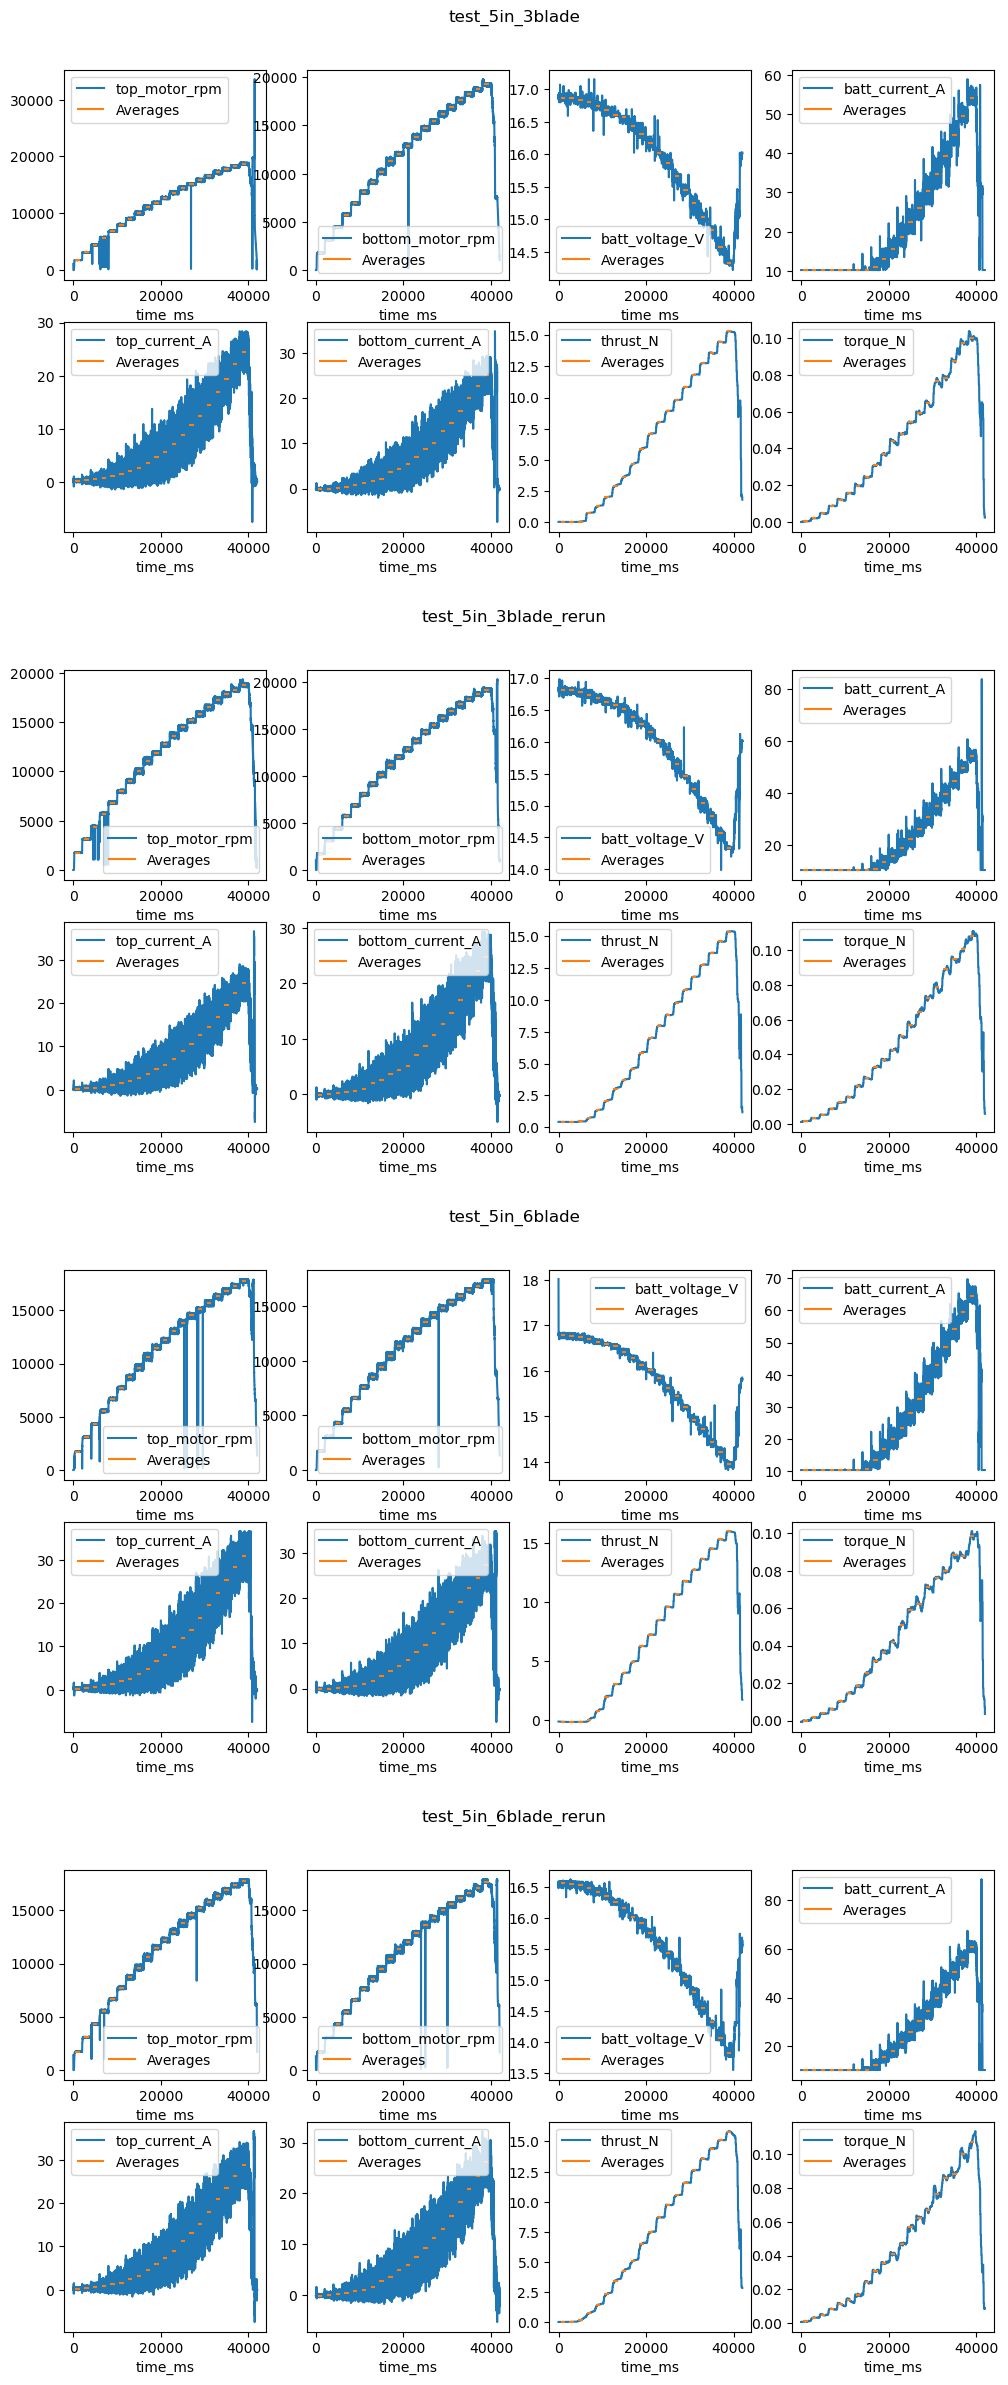

In [9]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [10]:
thrust_mean_g = df_steps["thrust_N"] / 9.81 * 1e3
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)
hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"] + df_steps["bottom_current_A"]
batt_voltage_mean = df_steps["batt_voltage_V"]
batt_power_mean = hall_current_mean * batt_voltage_mean

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
    }
)
df_thrust_power.loc["test_5in_3blade_rerun"]

,thrust_mean_g,batt_power_mean,thrust_power_g_W
throttle,,,
5,42.192499,1.381873,30.532825
10,41.274679,5.586505,7.388283
15,45.395320,10.698141,4.243290
20,72.444518,19.238029,3.765693
25,135.842983,26.747804,5.078659
30,210.242358,40.336381,5.212227
35,305.657574,66.749751,4.579157
40,376.746799,86.633422,4.348747
45,468.801094,119.779813,3.913857


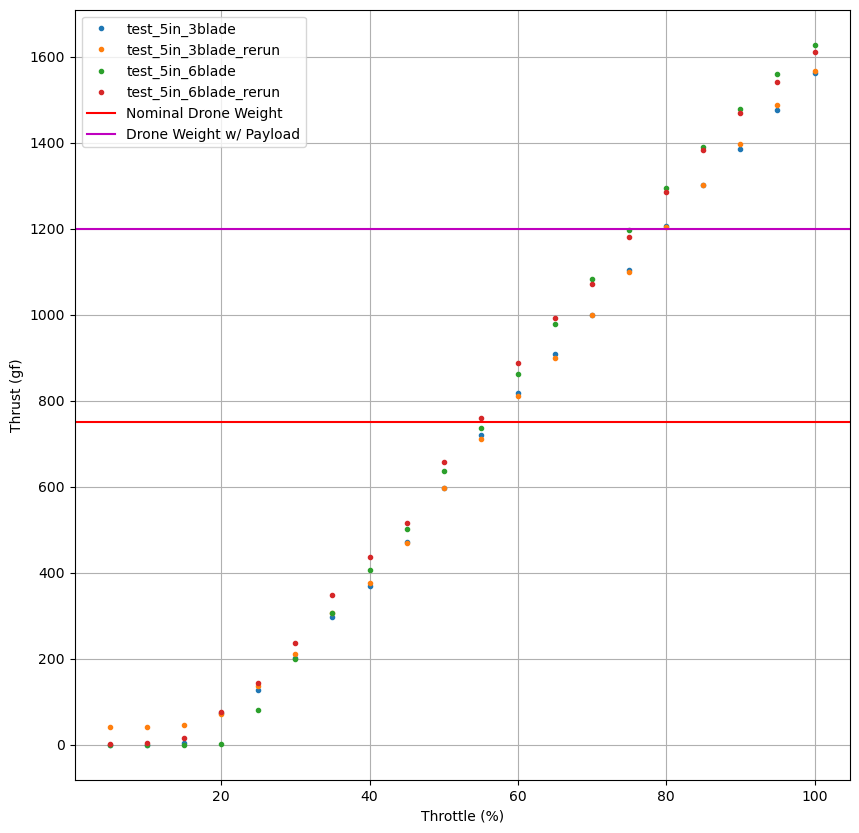

In [11]:
thrust_mean_g.unstack("test_name").plot(style=".", figsize=(10, 10))
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [12]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

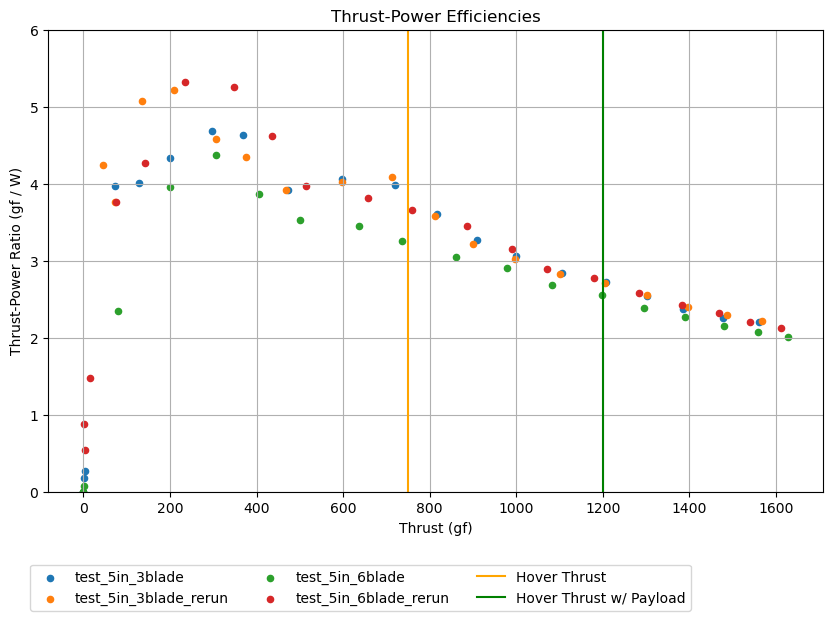

In [19]:
fig = plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n, s=20)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.ylim(0, 6)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

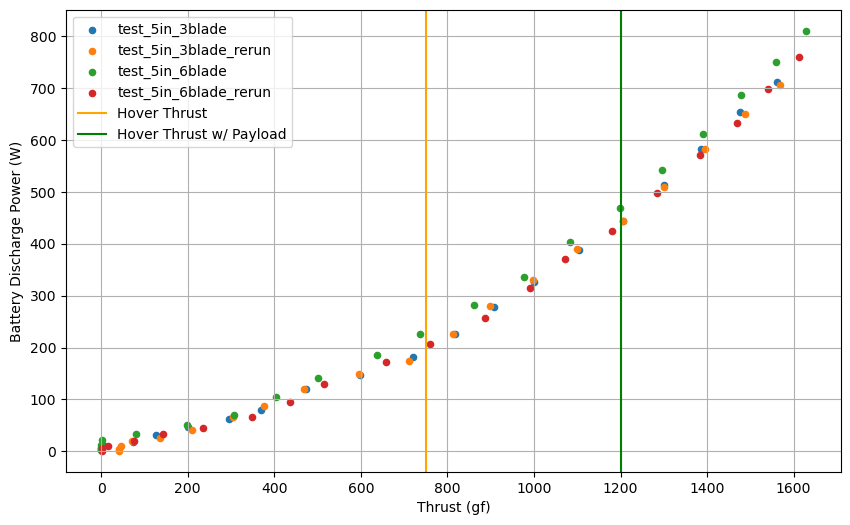

In [14]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
plt.grid()
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [15]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  batt_power_mean  \
test_name             thrust_mean_g                               
test_5in_3blade       750.0          56.532368       194.988291   
                      1200.0         79.687104       439.649163   
test_5in_3blade_rerun 750.0          56.902425       194.364022   
                      1200.0         79.772880       441.837237   
test_5in_6blade       750.0          55.555152       232.594791   
                      1200.0         75.104333       470.201963   
test_5in_6blade_rerun 750.0          54.559476       204.114709   
                      1200.0         75.938732       438.087792   

                                     thrust_power_g_W  
test_name             thrust_mean_g                    
test_5in_3blade       750.0                  3.865117  
                      1200.0                 2.730330  
test_5in_3blade_rerun 750.0                  3.890602  
                      1200.0                 2.716562  
test_5in_6blade       750.0                  3.229140  
                      1200.0                 2.552638  
test_5in_6blade_rerun 750.0                  3.676573  
                      1200.0                 2.744060

In [16]:
battery_capacity_Wh = 2 * 0.650 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name              thrust_mean_g
test_5in_3blade        750.0           0 days 00:05:55.221329871
                       1200.0          0 days 00:02:37.543800465
test_5in_3blade_rerun  750.0           0 days 00:05:56.362248891
                       1200.0          0 days 00:02:36.763609358
test_5in_6blade        750.0           0 days 00:04:57.788267750
                       1200.0          0 days 00:02:27.306913639
test_5in_6blade_rerun  750.0           0 days 00:05:39.338602299
                       1200.0          0 days 00:02:38.105295903
Name: flight_time, dtype: timedelta64[ns]

<Axes: title={'center': 'Flight time with a 4S 1300mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

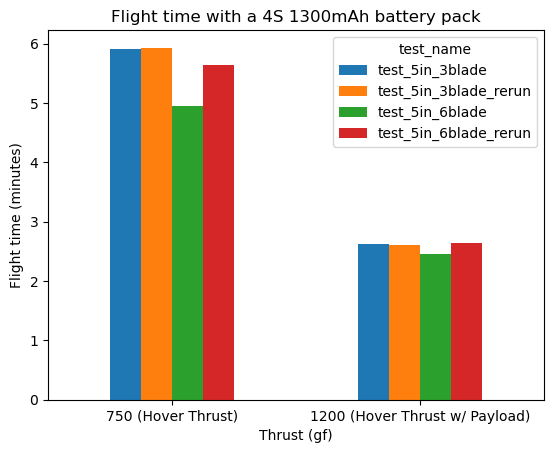

In [17]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1300mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
)